## Linear Transformations

Linear transformations are a valuable tool to help make your linear regression model more interpretable. They can involve transforming the scale, the mean, or both

The main reason to apply a linear transformation is so that the modeling results are more useful or interpretable to a stakeholder

In [5]:
# imports 

import pandas as pd
import seaborn  as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Scaling

In [6]:

df = pd.read_csv("./data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Data description

    MPG: The target variable, indicating fuel efficiency in miles per gallon.

    Cylinders: Number of cylinders in the car's engine.

    Displacement: Engine size, measured in cubic inches.

    Horsepower: Engine power in horsepower.

    Weight: Car's weight in pounds.

    Acceleration: Time to accelerate from 0 to 60 mph.

    Model Year: The car's model year (e.g., 70 for 1970).

    Origin: The country of manufacture (1 = USA, 2 = Europe, 3 = Japan).

    Car Name: The car model name.

In [7]:
model_df =[["cylinders", "mpg", "weight", "model year"]]

In [9]:
y = df["mpg"]
X = df[["cylinders", "weight", "model year"]]

X.head()

,cylinders,weight,model year
0,8,3504,70
1,8,3693,70
2,8,3436,70
3,8,3433,70
4,8,3449,70


In [10]:
def print_results(sk_model,ols_model):
    print(f"""

StatsModels intercept:    {ols_model.params["const"]}
scikit-learn intercept:   {sk_model.intercept_}

StatsModels coefficient:\n{ols_model.params}
scikit-learn coefficient: {sk_model.coef_}
""")

In [11]:
def build_ols_sk_model(X,y):
    
    ols_model = sm.OLS(y,sm.add_constant(X))
    ols_results = ols_model.fit()
    
    sk_model = LinearRegression()
    sk_results = sk_model.fit(X=X,y=y)
    
    print_results(sk_results,ols_results)
    
    return (ols_results,sk_results)

In [12]:
ols_results,sk_results =  build_ols_sk_model(X,y)




StatsModels intercept:    -13.907605934976734
scikit-learn intercept:   -13.907605934976782

StatsModels coefficient:
const        -13.907606
cylinders     -0.151729
weight        -0.006366
model year     0.752020
dtype: float64
scikit-learn coefficient: [-0.15172901 -0.0063657   0.75202005]



In [13]:
ols_results.rsquared

np.float64(0.8083884634554312)

## Linear Transformation ..

In [14]:
X_metric = X.copy()
# 1 lb = 0.45 kg
X_metric["weight"] = X_metric["weight"] * 0.453592

X_metric.head()

,cylinders,weight,model year
0,8,1589.386368,70
1,8,1675.115256,70
2,8,1558.542112,70
3,8,1557.181336,70
4,8,1564.438808,70


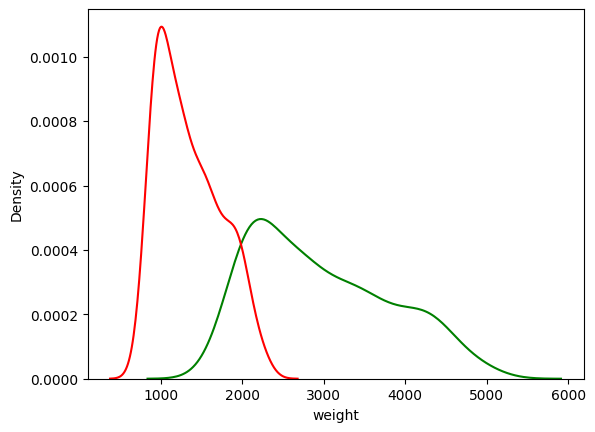

In [15]:
sns.kdeplot(data=X,x="weight",color="green")
sns.kdeplot(data=X_metric,x="weight",color="red")

plt.show()

### Building scaled model

In [16]:
ols_results_kg,sk_results_kg = build_ols_sk_model(X=X_metric,y=y)




StatsModels intercept:    -13.907605934976708
scikit-learn intercept:   -13.907605934976903

StatsModels coefficient:
const        -13.907606
cylinders     -0.151729
weight        -0.014034
model year     0.752020
dtype: float64
scikit-learn coefficient: [-0.15172901 -0.01403397  0.75202005]



In [17]:
ols_results_kg.rsquared

np.float64(0.8083884634554311)

The initial model is saying:

    For each increase of 1 lb in weight, we see an associated decrease of about .006 in MPG

The second model is saying:

    For each increase of 1 kg in weight, we see an associated decrease of about .014 in MPG


## Scaling the Target

In [26]:
# Convert y to m/mL and weight in grams
y_metric = df["mpg"] * 1
y_metric.name = "m/mL"
y_metric.head()


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: m/mL, dtype: float64

In [27]:
ols_results_kmh ,sk_results_kmh = build_ols_sk_model(X_metric,y_metric)



StatsModels intercept:    -13.907605934976708
scikit-learn intercept:   -13.907605934976903

StatsModels coefficient:
const        -13.907606
cylinders     -0.151729
weight        -0.014034
model year     0.752020
dtype: float64
scikit-learn coefficient: [-0.15172901 -0.01403397  0.75202005]



In [28]:
ols_results_kg.rsquared

np.float64(0.8083884634554311)

In [ ]:
# 1 mpg = 0.425 km/L
y_metric = df["mpg"] * 0.425144
y_metric.name = "km/L"
y_metric.head()

0    7.652592
1    6.377160
2    7.652592
3    6.802304
4    7.227448
Name: km/L, dtype: float64

C:\Users\Moringa School\AppData\Local\Temp\ipykernel_16508\1162180599.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


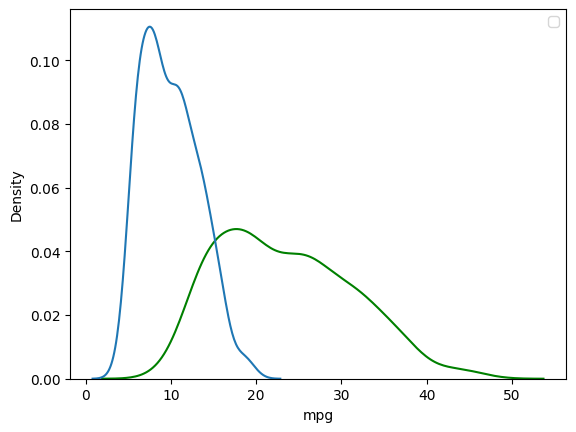

In [20]:
sns.kdeplot(x=y,color="green")
sns.kdeplot(x=y_metric)
plt.legend()

plt.show()

## Modeling  

In [21]:
ols_results_kmh ,sk_results_kmh = build_ols_sk_model(X_metric,y_metric)



StatsModels intercept:    -5.912735217619746
scikit-learn intercept:   -5.912735217619831

StatsModels coefficient:
const        -5.912735
cylinders    -0.064507
weight       -0.005966
model year    0.319717
dtype: float64
scikit-learn coefficient: [-0.06450668 -0.00596646  0.31971681]



Interpreting the weight coefficient specifically, the second model was saying:

    For each increase of 1 kg in weight, we see an associated decrease of about .014 in MPG

Whereas the model with a transformed target was saying:

    For each increase of 1 kg in weight, we see an associated decrease of about 0.006 in km/L


In [22]:
ols_results_kmh.rsquared

np.float64(0.8083884634554311)

## Shifting
While scaling means multiplying/dividing variables, shifting means adding or subtracting a value from the variable. Scaling impacts the predictor coefficients, whereas shifting impacts the constant coefficient (i.e. the intercept).

In [29]:
X.head()

,cylinders,weight,model year
0,8,3504,70
1,8,3693,70
2,8,3436,70
3,8,3433,70
4,8,3449,70


In [30]:
X_years_ce = X.copy()
X_years_ce["model year"] = X_years_ce["model year"] + 1900
X_years_ce.head()

,cylinders,weight,model year
0,8,3504,1970
1,8,3693,1970
2,8,3436,1970
3,8,3433,1970
4,8,3449,1970


<Axes: xlabel='model year', ylabel='Density'>

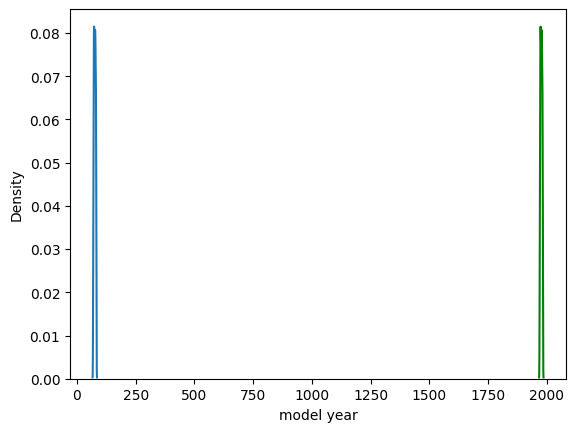

In [31]:
sns.kdeplot(data=X_years_ce,x="model year",color="green")
sns.kdeplot(data=X ,x="model year")

<Axes: xlabel='model year', ylabel='Density'>

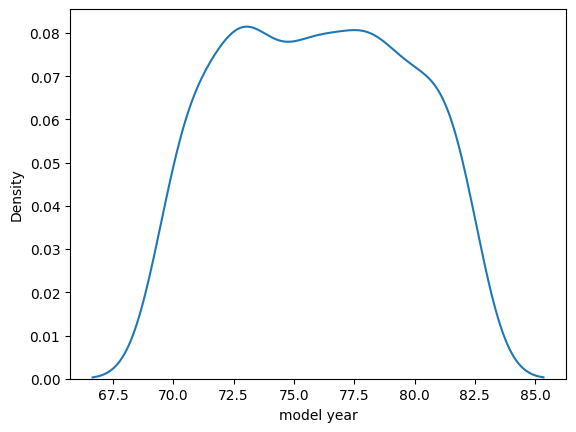

In [32]:
sns.kdeplot(data=X ,x="model year")

## Modeling 

In [33]:
ols_results_ce,sk_results_ce = build_ols_sk_model(X=X_years_ce,y=y)



StatsModels intercept:    -1442.7456987208975
scikit-learn intercept:   -1442.7456987209357

StatsModels coefficient:
const        -1442.745699
cylinders       -0.151729
weight          -0.006366
model year       0.752020
dtype: float64
scikit-learn coefficient: [-0.15172901 -0.0063657   0.75202005]



In the first model, it is saying:

    For a car with 0 cylinders, weighing 0 lbs, and built in 1900, we expect an MPG of about -14

In the newest model, it is saying:

    For a car with 0 cylinders, weighing 0 lbs, and built in 0, we expect an MPG of about -1400


## Shifting to Improve Intercept Interpretability
In all of the examples so far, the intercept has been an impossible value (negative fuel economy) resulting from an impossible set of predictor values (e.g. weight of 0). What if we want to calculate a more interpretable intercept instead?

To do this we'll shift the predictors so that a value of 0 represents the mean 

In [34]:
X.describe()

,cylinders,weight,model year
count,392.000000,392.000000,392.000000
mean,5.471939,2977.584184,75.979592
std,1.705783,849.402560,3.683737
min,3.000000,1613.000000,70.000000
25%,4.000000,2225.250000,73.000000
50%,4.000000,2803.500000,76.000000
75%,8.000000,3614.750000,79.000000
max,8.000000,5140.000000,82.000000


## Centering

In [35]:
X_centered = X.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,cylinders,weight,model year
count,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,3.712223e-14,-4.640279e-15
std,1.705783e+00,8.494026e+02,3.683737e+00
min,-2.471939e+00,-1.364584e+03,-5.979592e+00
25%,-1.471939e+00,-7.523342e+02,-2.979592e+00
50%,-1.471939e+00,-1.740842e+02,2.040816e-02
75%,2.528061e+00,6.371658e+02,3.020408e+00
max,2.528061e+00,2.162416e+03,6.020408e+00


In [36]:
ols_results_centered,sk_results_centered = build_ols_sk_model(X=X_centered,y=y)



StatsModels intercept:    23.445918367346955
scikit-learn intercept:   23.44591836734694

StatsModels coefficient:
const         23.445918
cylinders     -0.151729
weight        -0.006366
model year     0.752020
dtype: float64
scikit-learn coefficient: [-0.15172901 -0.0063657   0.75202005]



However we now have a more meaningful intercept. In our initial model, the intercept interpretation was this:

    For a car with 0 cylinders, weighing 0 lbs, and built in 1900, we would expect an MPG of about -13.9

That is an impossible MPG, for an impossible car.

In our zero-centered model, the intercept interpretation is this:

    For a car with the average number of cylinders, average weight, and average model year, we would expect an MPG of about 23.4



### Standardizing: Centering + Scaling

Standardization is a combination of zero-centering the variables and dividing by the standard deviation.

x ′ = x − x ¯/ σ

After performing this transformation, x ′ will have mean of 0 and a standard deviation of 1.

In [37]:
X.describe()

,cylinders,weight,model year
count,392.000000,392.000000,392.000000
mean,5.471939,2977.584184,75.979592
std,1.705783,849.402560,3.683737
min,3.000000,1613.000000,70.000000
25%,4.000000,2225.250000,73.000000
50%,4.000000,2803.500000,76.000000
75%,8.000000,3614.750000,79.000000
max,8.000000,5140.000000,82.000000


### stardardizing

In [38]:
X_standardized = X.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()
    

X_standardized.describe()

,cylinders,weight,model year
count,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,3.625218e-17,-1.232574e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.449152e+00,-1.606522e+00,-1.623241e+00
25%,-8.629108e-01,-8.857216e-01,-8.088504e-01
50%,-8.629108e-01,-2.049490e-01,5.540071e-03
75%,1.482053e+00,7.501341e-01,8.199306e-01
max,1.482053e+00,2.545808e+00,1.634321e+00


## model

In [39]:
ols_results_std,sk_results_std =  build_ols_sk_model(X=X_standardized,y=y)



StatsModels intercept:    23.445918367346952
scikit-learn intercept:   23.44591836734694

StatsModels coefficient:
const         23.445918
cylinders     -0.258817
weight        -5.407040
model year     2.770244
dtype: float64
scikit-learn coefficient: [-0.25881681 -5.40703975  2.77024374]



We have the same intercept as the zero-centered model (since this model's features were also centered), but now the coefficients look quite different. We can interpret them like this:

    For each increase of 1 standard deviation in the number of cylinders, we see an associated decrease of about 0.26 MPG

    For each increase of 1 standard deviation in the weight, we see an associated decrease of about 5.4 MPG

    For each increase of 1 standard deviation in the model year, we see an associated increase of about 2.8 MPG


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_sk_stardardized = scaler.fit_transform(X)

ols_sk_std_results,sk_sk_std_results = build_ols_sk_model(X_sk_stardardized,y)



StatsModels intercept:    23.445918367346952
scikit-learn intercept:   23.44591836734694

StatsModels coefficient:
const    23.445918
x1       -0.258486
x2       -5.400139
x3        2.766708
dtype: float64
scikit-learn coefficient: [-0.25848647 -5.40013861  2.766708  ]



<Axes: xlabel='cylinders', ylabel='Density'>

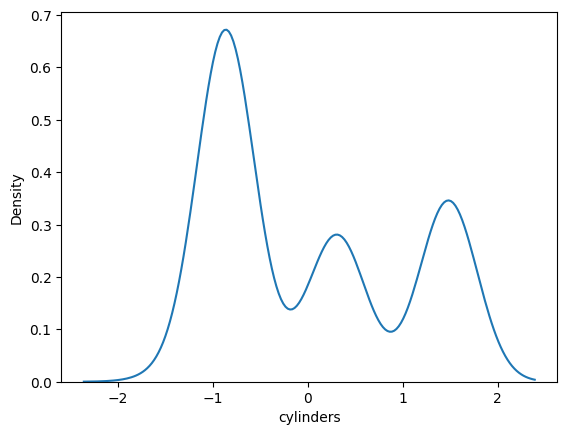

In [41]:
sns.kdeplot(x=X_standardized["cylinders"])